In [24]:
from fractal_printer import fractal_sdfs as fs
import quaternion as qu
import matplotlib.pyplot as plt
import numpy as np
from sdf.sdf.d3 import sphere, torus, slab
from importlib import reload


[[22.91020477]
 [23.13443175]]
[-0.55551102 -1.2         0.        ]


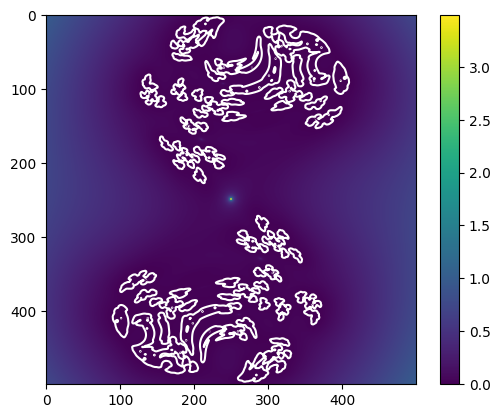

In [35]:
# Make construct an sdf estimator for a 3D julia set
reload(fs)

julia_sdf = fs.quaternion_julia_sdf(qu.quaternion(0.4,0.2,0.5,0), iterations=60, offset=0.005)

# Test it
p = np.array([[0,10,0],[10,0,0]])
print(julia_sdf(p))

# Use the SDF to make a 2d rendering of the julia set
points = 500
radius = 1.2
x = np.linspace(-radius,radius,points)
y = np.linspace(-radius,radius,points)

X,Y = np.meshgrid(x, y, indexing="xy")

p = np.vstack((X.flatten(), Y.flatten(), np.zeros_like(X).flatten())).T
print(p[134])
d = julia_sdf(p)

# Plot it!
D = d.reshape((points,points))

im = plt.imshow(D)
plt.contour(D,levels=[0],colors="w")
plt.colorbar(im)

In [36]:
# Export a 3d rendering
radius = 1.2
julia_sdf.save("test_julia_1.stl",bounds = ([-radius]*3,[radius]*3), samples=2**24)

min -1.2, -1.2, -1.2
max 1.2, 1.2, 1.2
step 0.009375, 0.009375, 0.009375
18191447 samples in 512 batches with 8 workers
  100% (512 of 512) [##############################] 0:00:15 0:00:00    
201 skipped, 22 empty, 289 nonempty
2737018 triangles in 15.2351 seconds


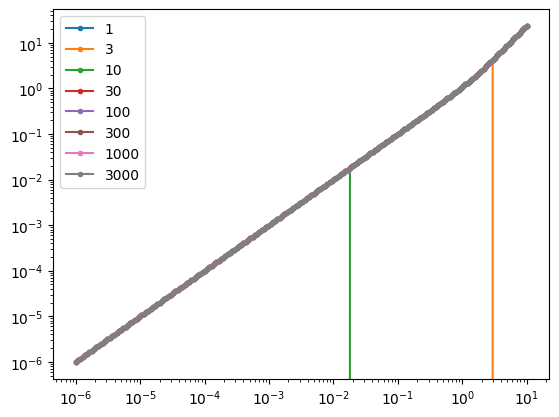

In [18]:
# Test convergence with iteration count

fig, ax = plt.subplots(1,1)

ax.set_xscale("log")
ax.set_yscale("log")
y = np.geomspace(1e-6,1e1,200)
points = np.vstack((np.zeros_like(y),y,np.zeros_like(y))).T

for iterations in [1,3,10,30,100,300,1000,3000]:
    line_julia = df.generalized_mandelbrot(cx=-2, iterations=iterations, offset=0)

    distance = line_julia(points)

    ax.plot(y,distance,".-",label=iterations)

ax.legend()



min -1.2, -1.2, -1.2
max 1.2, 1.2, 1.2
step 0.009375, 0.009375, 0.009375
18191447 samples in 512 batches with 8 workers
  100% (512 of 512) [##############################] 0:00:21 0:00:00    
194 skipped, 20 empty, 298 nonempty
2098648 triangles in 21.033 seconds
 
*** Profile stats marshalled to file '/tmp/tmpp4qo3hde'.
Embedding SnakeViz in this document...
<function display at 0x7c80911a4680>


In [ ]:
# Export a sliced 3D rendering
sectioned_julia = julia_sdf & slab(z0 = 0)
sectioned_julia.save("sectioned_julia.stl",bounds = ([-radius]*3,[radius]*3), samples=2**24)

min -1.2, -1.2, -1.2
max 1.2, 1.2, 1.2
step 0.009375, 0.009375, 0.009375
18191447 samples in 512 batches with 8 workers
  100% (512 of 512) [##############################] 0:00:15 0:00:00    
311 skipped, 52 empty, 149 nonempty
1064428 triangles in 15.0831 seconds
